# Introducción a la inferencia estadística
#IE06 Conceptos básicos - Parte 2



## <font color='blue'>**Más conceptos básicos**</font>

Una de las cosas más fascinantes sobre el estudio de la teoría de probabilidad es que si bien el comportamiento de un __evento__ individual es totalmente impredecible, el comportamiento de una cantidad suficientemente grande de eventos se puede predecir con un alto grado de certeza. Si tomamos el caso clásico del lanzamiento de una moneda, no podemos predecir con exactitud cuantas caras podemos obtener luego de 10 lanzamientos, tal vez el azar haga que obtengamos 7, 10, o 3 caras; pero si repetimos el lanzamiento un millón de veces, casi con toda seguridad, la cantidad de caras se aproximará a la verdadera probabilidad subyacente del experimento, i.e., al 50% de los lanzamientos. Este comportamiento es lo que en la teoría de probabilidad se conoce con el nombre de __ley de grandes números__; pero antes de poder definir esta ley, primero debemos describir otro concepto también muy importante, la __independencia__ de los __eventos__.

## <font color='blue'>**El concepto de independencia**</font>

En __teoría de probabilidad__, podemos decir que dos __eventos__ son __independientes__ cuando la probabilidad de cada uno de ellos no se ve afecta porque el otro evento ocurra, es decir que no existe ninguna relación entre los __eventos__. Esto a menudo es razonable y fácil de lograr en las computadoras, aunque puede ser difícil en otros contextos, por ejemplo, ¿cómo se logran lanzamientos de moneda idénticamente aleatorios?.

En estadística, esta expectativa se denomina "independiente e idénticamente distribuida", o IID, iid o i.i.d. para abreviar. Esto es para garantizar que las muestras se extraigan efectivamente de la misma distribución de población subyacente.

En el lanzamiento de la moneda; la moneda no sabe, ni le interesa saber si el resultado del lanzamiento anterior fue cara; cada lanzamiento es un suceso totalmente aislado el uno del otro y la __probabilidad__ del resultado va a ser siempre 50% en cada lanzamiento.

## <font color='blue'>**Ley de los grandes números**</font>

Visto el concepto de __independencia__, estamos en condiciones de dar una definición más formal de la __ley de grandes números__.

Podemos formular esta ley de la siguiente manera: si se repite un __experimento aleatorio__, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son __independientes__ la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con __probabilidad 1__ a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento. 

Podemos pensar en el resultado de un **experimento** como una **observación**. La repetición autónoma e independiente del experimento realizará múltiples ensayos y dará lugar a múltiples observaciones. Todas las observaciones de muestra para un experimento se extraen de una población idealizada de observaciones.

Lo que esta ley nos enseña, es que la probabilidad subyacente de cualquier suceso aleatorio puede ser aprendido por medio de la experimentación, simplemente tendríamos que repetirlo una cantidad suficientemente grande de veces. Un error que la gente suele cometer y asociar a esta ley, es la idea de que un evento tiene más posibilidades de ocurrir porque ha o no ha ocurrido recientemente. Esta idea de que las chances de un evento con una probabilidad fija, aumentan o disminuyen dependiendo de las ocurrencias recientes del evento, es un error que se conoce bajo el nombre de la __falacia del apostador__.

La ley de los grandes números nos ayuda a comprender por qué no podemos confiar en una sola observación de un experimento de forma aislada. Nos recuerda además, que debemos repetir el experimento para desarrollar una muestra grande y representativa de observaciones antes de comenzar a hacer inferencias sobre lo que significa el resultado.

A medida que aumentamos el tamaño de la muestra, el hallazgo o la media de la muestra retrocederá hacia la media de la población, hacia el verdadero valor subyacente esperado. Esto se llama regresión a la media o, a veces, reversión a la media.

### Un ejemplo en Python

La demostracion del teorema requiere conceptos de teoria de la medida y espacios funcionales. Sin embargo, podemos ilustrar la ley de los grandes números con un pequeño ejemplo en Python.

Primero, podemos diseñar una distribución subyacente idealizada. Usaremos una distribución gaussiana con una media de 100 y una desviación estándar de 10. El valor esperado o la media de esta población es, por tanto, 100.

Nota: Veremos en detalle estas y otras distribuciones más adelante.

A continuación se muestra un código que genera un gráfico de esta distribución idealizada.

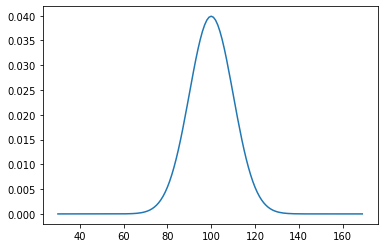

In [1]:
# distribución de población idealizada
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

xaxis = np.arange(30, 170, 1)

yaxis = norm.pdf(xaxis, 100, 10)
# Grafico de la poblacion ideal. 
plt.plot(xaxis, yaxis)
plt.show()


Ahora, supongamos que no conocemos los parámetro de la población. Realizaremos muestras aleatorias independientes de ella para determinar sus estadísticos y, a partir de ellos, inferir los parámetros.

Podemos crear muestras de diferentes tamaños y calcular la media. Dada nuestra intuición y la ley de los grandes números, esperamos que a medida que aumenta el tamaño de la muestra, la media de la muestra se aproximará mejor a la media de la población.

Utilizaremos la función _randn_ de Numpy para generar muestras aleatorias de la siguiente forma:
```
sigma * np.random.randn(sample_size) + mu
```

[99.03, 99.59, 100.96, 101.03, 99.97, 100.44, 99.85, 100.08, 100.0, 100.05, 100.02]


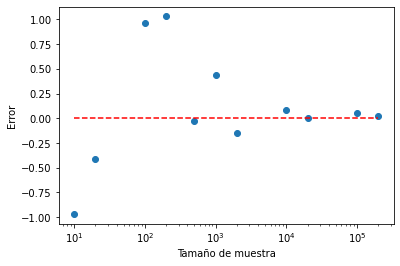

In [4]:
# Ilustrar la ley de los grandes números

# Fijemos una semilla para reproducir el resultado. 
np.random.seed(1)
# Tamaño de las muestras
sizes = [10, 20, 100, 200, 500, 1000, 2000, 10000, 20000, 100000, 200000]
# generar muestras de diferentes tamaños y calcular sus medias
means = [np.mean(10 * np.random.randn(size) + 100).round(2) for size in sizes]
print(means)
# graficar el error medio de la muestra frente al tamaño de la muestra
plt.xscale('log')
plt.ylabel('Error')
plt.xlabel('Tamaño de muestra')
plt.plot([sizes[0], sizes[-1]], [0, 0], 'r--')
plt.scatter(sizes, np.array(means) - 100)
plt.show()

Para entender mejor la ley de grandes números, experimentemos con algunos ejemplos en Python. Utilicemos nuevamente el ejemplo del lanzamiento de la moneda, en el primer ejemplo, la moneda va a tener la misma posibilidad de caer en cara o sello; mientras que en el segundo ejemplo, vamos a modificar la probabilidad de la moneda para que caiga cara solo en 1 de 6 veces.

[0.0, 0.5, 0.6666666666666666, 0.25, 0.6, 0.8333333333333334, 0.5714285714285714, 0.75, 0.3333333333333333, 0.7, 0.5454545454545454, 0.5833333333333334, 0.38461538461538464, 0.2857142857142857, 0.5333333333333333, 0.4375, 0.29411764705882354, 0.5555555555555556, 0.5263157894736842, 0.55, 0.47619047619047616, 0.6363636363636364, 0.5217391304347826, 0.5, 0.56, 0.5, 0.4444444444444444, 0.42857142857142855, 0.4482758620689655, 0.5333333333333333, 0.3870967741935484, 0.3125, 0.5454545454545454, 0.5588235294117647, 0.4, 0.5555555555555556, 0.5675675675675675, 0.4473684210526316, 0.4358974358974359, 0.475, 0.5121951219512195, 0.4523809523809524, 0.4418604651162791, 0.4772727272727273, 0.5111111111111111, 0.32608695652173914, 0.6170212765957447, 0.5, 0.5306122448979592, 0.46, 0.49019607843137253, 0.46153846153846156, 0.5471698113207547, 0.4444444444444444, 0.6545454545454545, 0.42857142857142855, 0.543859649122807, 0.4827586206896552, 0.4067796610169492, 0.45, 0.45901639344262296, 0.5, 0.60317

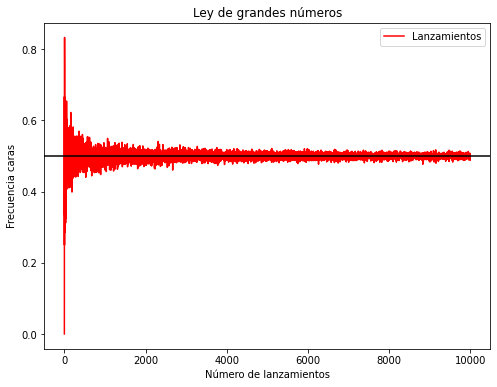

In [ ]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 sello=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

print(resultados)

# graficamente
df = pd.DataFrame({'Lanzamientos': resultados})

df.plot(title='Ley de grandes números', color='r', figsize=(8, 6))
plt.axhline(0.5, c='k')
plt.xlabel("Número de lanzamientos")
plt.ylabel("Frecuencia caras")
plt.show()

## <font color='green'>**Actividad 1**</font>

Verifique la ley de los grandes números a través de lanzamientos de una moneda "cargada", las caras caen con probabilidad de solo 1 de 6 veces. 

Realice lanzamientos de la mondena en rangos entre 1 y 100000. Calcule cuantas caras fueron obtenidas y calcule la proporcion de éstas respecto del total, posteriormente grafique el número obtenido verificando que converge a 0.166.


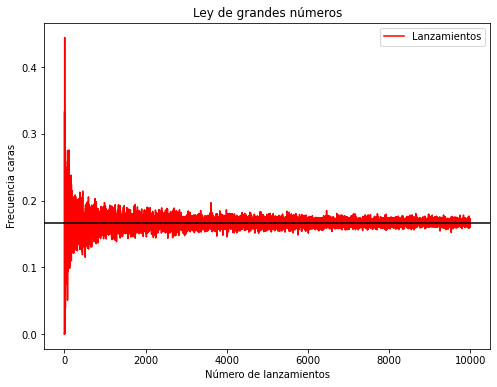

In [ ]:
# Tu código aquí ...

resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6]) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# print(resultados)
# resultados = np.random.choice([0,1], size=10000, p=[1/6, 5/6])

# graficamente
df = pd.DataFrame({'Lanzamientos': resultados})
# print(df)

df.plot(title='Ley de grandes números', color='r', figsize=(8, 6))
plt.axhline(0.166, c='k')
plt.xlabel("Número de lanzamientos")
plt.ylabel("Frecuencia caras")
plt.show()



**_Conclusion_** : Cuando mayor es el número de lanzamientos la probabilidad converge a la probabilidad en que esta "cargada" la moneda, es decir, 1/6. Otro factor que se reduce es la desviación existente con respecto al valor medio de 1/6 de probabilidad.

<font color='green'>Fin actividad 1</font>

## <font color='blue'>**Teorema del Límite Central (CLT)**</font>

### Conceptos necesarios


#### Muestras y distribución muestral

Antes de llegar al teorema en sí, es fundamental comprender los componentes básicos y el contexto. El objetivo principal de la estadística inferencial es hacer inferencias sobre una **población** determinada, utilizando solo un subconjunto de ella. A este subconjunto se le denomina **muestra**.

Se necesita hacer esto ya que, en general, los parámetros que definen la distribución de la población, como es la media $\mu$ y la varianza $\sigma$ de la población, no se conocen. En tales situaciones, una muestra se recolecta típicamente de manera aleatoria, y la información obtenida de ella se usa luego para derivar estimaciones para toda la población.

Este enfoque es, a la vez, eficiente en el tiempo y rentable para la organización/empresa/investigador que realiza el análisis. Es importante que la muestra sea una buena representación de la población, a fin de generalizar las inferencias extraídas de la muestra a la población de manera significativa.

Sin embargo, el desafío es que al ser la muestra solo un subconjunto, las estimaciones pueden no ser tan buenas, y, por lo tanto, propensas a errores. Es decir, es posible que no reflejen la población con precisión.

Por ejemplo, si estamos tratando de estimar la media poblacional $\mu$
usando una media muestral $x$, luego, dependiendo de qué observaciones caigan en la muestra, podríamos obtener diferentes estimaciones de la población con diferentes niveles de errores.

El punto central aquí es que la media de la muestra en sí misma es una variable aleatoria, que depende del tipo de muestra y de las observaciones que la conformen.

Como cualquier otra variable aleatoria en estadística, la media muestral
$x$ también tiene una distribución de probabilidad, que muestra las densidades de probabilidad para diferentes valores de la media muestral.
Esta distribución a menudo se denomina __"distribución de muestreo"__. El siguiente diagrama resume este punto visualmente.

![tipos de variables](https://drive.google.com/uc?export=view&id=1ebyuGeWBjxU4WMUn3MdiZxeo9PkEK2js)



El __teorema del límite central__  una teoría estadística que establece que, dada una muestra aleatoria suficientemente grande de la población, la distribución de las medias muestrales seguirá una distribución normal.

### Teorema del límite central: declaración y suposiciones

Suponga que $X$ es una variable aleatoria (no necesariamente normal) que representa los datos de la población. Y la distribución de $X$ tiene una media $\mu$ y una desviación estándar $\sigma$. Suponga que estamos tomando muestras repetidas de tamaño $n$ de la población anterior.

Entonces, el teorema del límite central establece que, dado un tamaño de muestra suficientemente alto, las siguientes propiedades son verdaderas:

1. Media de la distribución muestral = Media poblacional ($\mu$)
2. Desviación estándar de la distribución muestral (error estándar) = $\frac{\sigma}{\sqrt{n}}$
, tal que, para n ≥ 30, la distribución muestral tiende a una distribución normal para todos los propósitos prácticos.
3. La varianza de la distribución de las medias muestrales será $\frac{\sigma^2}{n}$. Que es la varianza de la población dividido entre el tamaño de la muestra.

Es decir:

$$ \bar{x} \rightarrow \mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$$

¿Para qué sirve el teorema central del límite?
 
1. Permite averiguar la probabilidad de que la media de una muestra concreta esté en un cierto intervalo.
2. Permite calcular la probabilidad de que la suma de los elementos de una muestra esté, a priori, en un cierto intervalo.

$$ \sum_{n=1}^{n} x_i \rightarrow \mathcal{N}(n\mu, \sigma\sqrt{n})$$
3. Inferir la media de la población a partir de una muestra.



### Comprobacion  del Teorema del limite central  en acción usando simulaciones en Python.

#### Población distribuida exponencialmente

Supongamos que estamos tratando con una población que está distribuida exponencialmente. La distribución exponencial es una distribución continua que se usa a menudo para modelar el tiempo esperado que se debe esperar antes de que ocurra un evento.

El principal parámetro de distribución exponencial es el parámetro 'tasa'
$\lambda$ , de manera que tanto la media como la desviación estándar de la distribución están dadas por ($\frac{1}{\lambda}$).

$$ f(x) = \left \{ \begin{matrix} \lambda e^{-\lambda x} & \mbox{si }x\mbox{ > 0}
\\ 0 & \mbox{de otra manera }\end{matrix}\right. $$

$$ \mathbb{E}(x) = \frac{1}{\lambda}  $$

$$ Varianza = \frac{1}{\lambda^2}$$

In [5]:
# Importamos las librerías de trabajo
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definimos nuestra población con distribución exponencial con $\lambda$ = 0.25. Este lambda podria representar, a modo de ejmplo, la tasa de llegada de una nueva llamada al Call Center; esto es, llega una nueva llamada cada 4 minutos en promedio ($1/\lambda = 4  min$)

Entonces, 

X (variables aleatoria) = Tasa de llegada de una nueva llamada al Call Center

X ~ exponencial($λ = 0.25$)

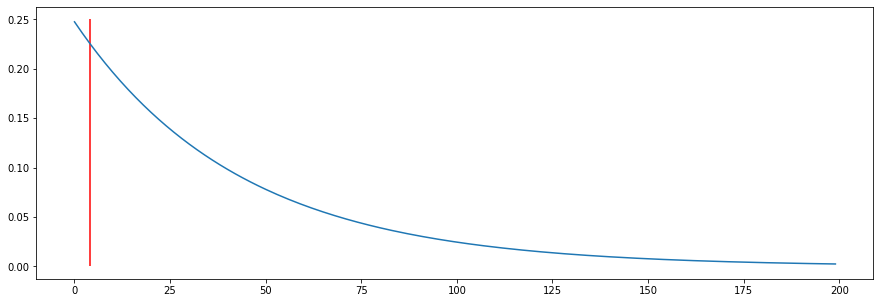

In [6]:
# Definimos nuestra población con distribución exponencial con lambda = 0.25
l = 0.25
exp = stats.expon(loc=0, scale=1/l)
# Creamos un espacio lineal y la FDP de nuestra variable
x = np.linspace(exp.ppf(0.01), exp.ppf(0.99), 200)
fdp_exp = exp.pdf(x)

# Ploteamos la distribución y su media (rojo)
plt.figure(figsize=(15,5))

#fig, ax = plt.subplots(2,1, figsize=(15,5))
plt.plot(fdp_exp)
plt.vlines(x=exp.mean(), ymin=0, ymax=0.25, colors='r')
plt.show()

In [7]:
print(f'Media poblacional = {exp.mean()}')
print(f'Desviación estándar poblacional = {exp.std()}')

Media poblacional = 4.0
Desviación estándar poblacional = 4.0


A continuación extraeremos 1 muestra de tamaño 20 y calcularemos su media $\bar{x}$.

In [8]:
muestra = exp.rvs(size=20, random_state=53)
print('Muestra de tamaño 20\n')
print(muestra)
print(f'\nMedia de la muestra = {muestra.mean():4.2f}')
print(f'Desviación estándar de la muestra = {muestra.std():4.2f}')

Muestra de tamaño 20

[7.5004532  3.29453209 2.42696356 1.73653819 3.52612158 3.06932611
 7.02841843 1.22904846 2.6032565  1.70952421 0.57769143 1.20429794
 0.1952263  2.00543765 1.85841656 3.25433123 9.11135741 0.73254781
 2.09163614 4.22627463]

Media de la muestra = 2.97
Desviación estándar de la muestra = 2.32


Ploteamos la distribución, su media (rojo) y la media de la muestra (verde)


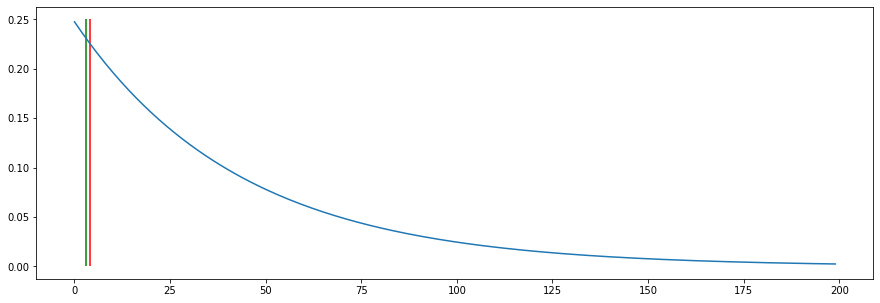

In [ ]:
# Ploteamos la distribución, su media (rojo) y la media de la muestra (verde)
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(fdp_exp)
ax.vlines(x=exp.mean(), ymin=0, ymax=0.25, colors='r')
ax.vlines(muestra.mean(), ymin=0, ymax=0.25, colors='g')
plt.show()

Observamos una diferencia entre la media poblacional y la de la muestra. Para analizar el efecto de distintas cantidades y tamaños de muestras desarrollaremos una función. Intenta entender qué hace esta función.


In [9]:
def tcl(var, n_muestra, size, kde=True):
  '''
  var :: distribución de probabilidad analizada
  n_muestra :: Cantidad de muestras
  size :: Tamaño de cada muestra
  kde :: kernel density estimation
  '''
  fig, ax = plt.subplots(figsize=(15,10))
  grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.1, width_ratios=[2, 1])

  muestra = []
  x_medias_muestrales = []
  # Generamos las n_muestras 
  for m in range(n_muestra):
    muestra.append(var.rvs(size=size))
    
  # Plot de la distribución, su media y la media muestral
  ax = plt.subplot(grid[0,0])
  ax.plot(fdp_exp)
  for m in muestra:
    ax.vlines(m.mean(), ymin=0, ymax=0.25, colors='g', alpha=0.1)
    x_medias_muestrales.append(m.mean())
  ax.vlines(x=var.mean(), ymin=0, ymax=0.25, colors='r', linewidths=3)

  # Zoom in de lo anterior
  ax = plt.subplot(grid[0,1])
  ax.plot(fdp_exp)
  for m in muestra:
    ax.vlines(m.mean(), ymin=0, ymax=0.35, colors='g', alpha=0.1)
  ax.set_xlim(0,10)
  ax.set_ylim(0.15, 0.35)
  ax.vlines(x=var.mean(), ymin=0, ymax=0.35, colors='r', linewidths=3)

  # El plot 3 nos lo saltamos y dejamos el espacio vacío
  ax = plt.subplot(grid[1,0])
  plt.axis('off')

  # Ploteamos un histograma con KDE de la distribución de las medias muestrales
  ax = plt.subplot(grid[1,1])
  #ax.set_xlim(0, 10)
  sns.histplot(x_medias_muestrales, kde=kde, bins=20, color='g')
  plt.suptitle(f'''Teorema del Límite Central evaluado con {n_muestra} muestras \
  \nTamaño muestra = {size}\
  \nMedia de la distribución muestral = {np.mean(x_medias_muestrales): 4.2f}''')
  plt.show()


Una vez creada la función la invocaremos con 10 muestras de tamaño 2 y plotearemos sus medias comparadas con la media poblacional.

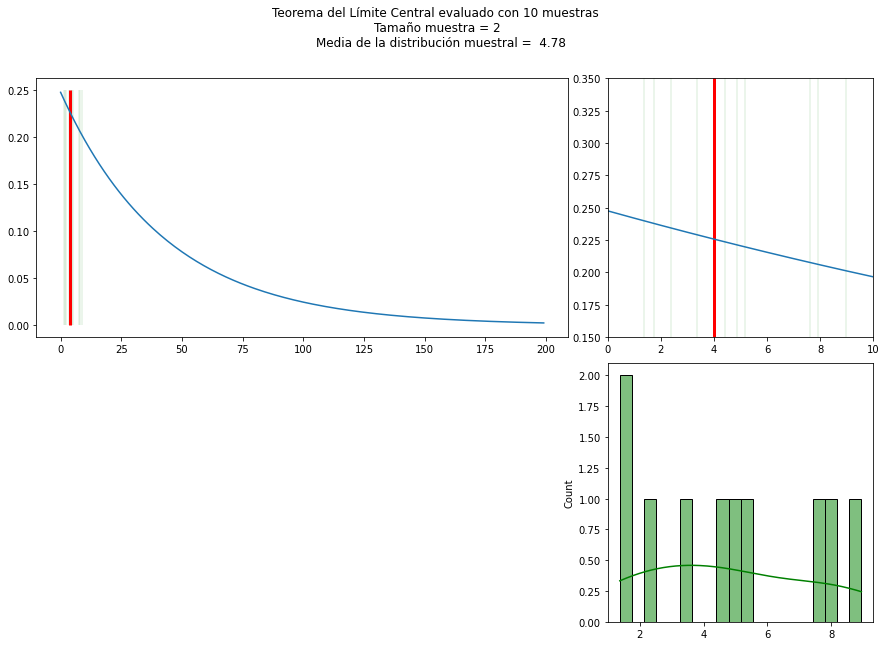

In [10]:
tcl(var=exp, n_muestra=10, size=2, kde=True)

Observamos que el histograma de las medias muestrales no tiene una distribución clara; no podemos decir que es una distribucion normal.

Aumentemos la cantidad de muestras a 50 y mantengamos el tamaño de la muestra en 2.

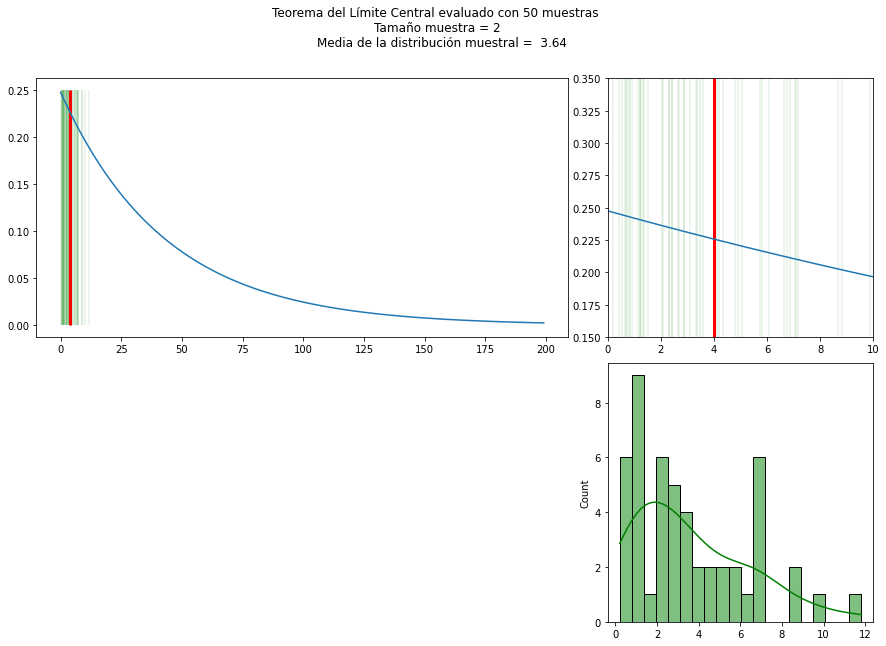

In [11]:
tcl(var=exp, n_muestra=50, size=2, kde=True)

Ahora con 100 muestras de tamaño 2.

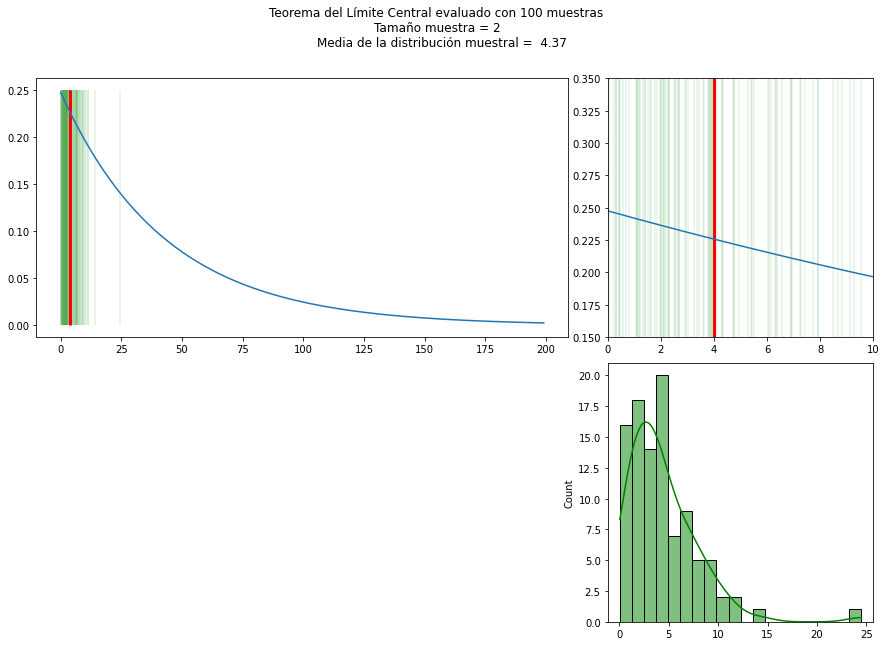

In [12]:
tcl(var=exp, n_muestra=100, size=2, kde=True)

Podemos observar que incluso para un tamaño de muestra pequeño como 2, la distribución de las medias muestrales se ve muy diferente a la de la población exponencial de origen y se parece más a una mala aproximación de una distribución normal, con asimetría positiva.

Veamos ahora los mismos ejemplos de cantidades de muestras, pero esta vez aumentando el tamaño muestral. Primero `n_muestra=10` y `size=30`.


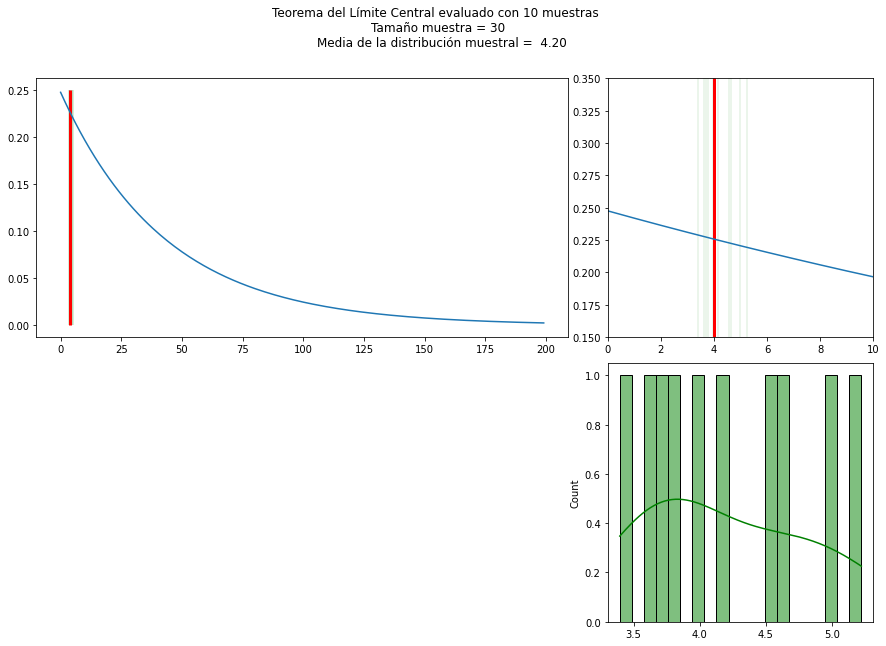

In [13]:
tcl(exp, n_muestra=10, size=30, kde=True)

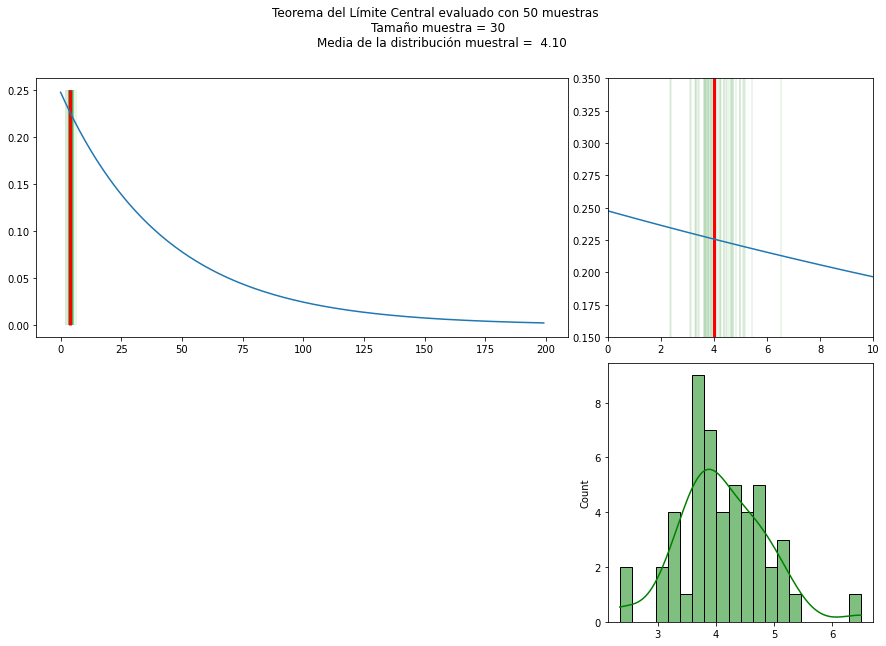

In [14]:
tcl(exp, n_muestra=50, size=30, kde=True)

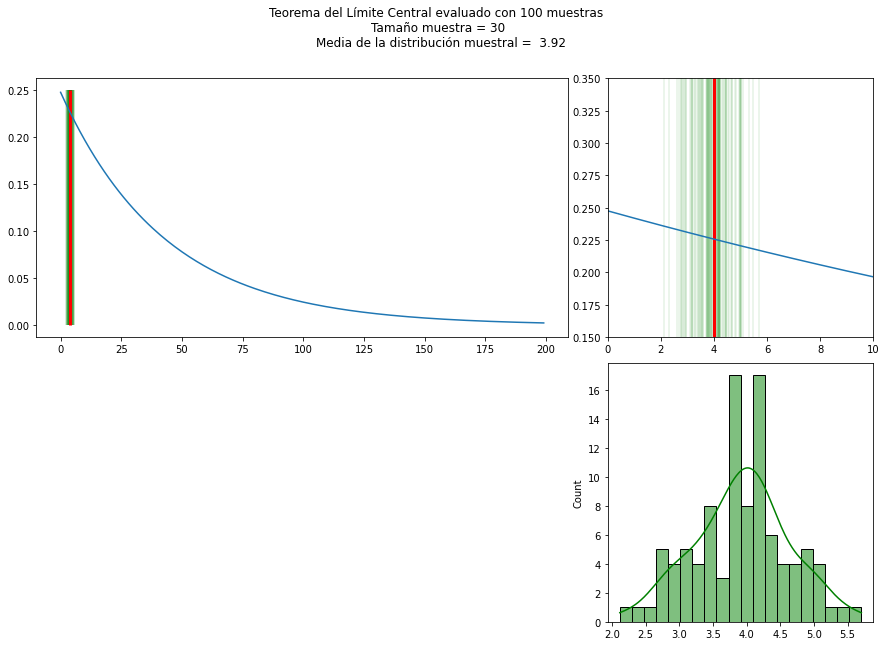

In [16]:
tcl(exp, n_muestra=100, size=30, kde=True)

Después de agregar 100 muestras al histograma, podemos ver claramente que las medias muestrales __están distribuidas de forma normal__, con una media que se aproxima a la media poblacional ($\mu=4$). Además, podemos observar que a medida que aumentamos el tamaño de la muestra de 2 a 30 y/o la cantidad de muestras, de 10 a 100, la distribución de las medias muestrales comienza a parecerse cada vez más a una distribución normal, con la media dada por la media poblacional $\mu$ y la desviación estándar dada por ($\frac{\sigma}{\sqrt{n}}$), tal como indica el __TLC__.

Aún cuando estas medias fueron calculadas usando datos desde una distribución exponencial, las medias (como variables aleatorias en sí mismas) __no están__ distribuidas expnencialmente.

Observe también que la media de la distribución de la muestras se acerca a la media poblacional de la distribución original.

El __TLC__ nos dice que, no importa que tipo de distribución tiene una variable. Si se extraen muestras desde esa distribución, las __medias de dichas muestras estarán normalmente distribuidas__. 

Nota: De lo anterior, se desprende que las muestras deben tener valor esperado, lo cual es cierto en prácticamente todas las distribuciones (el contra ejemplo es la [Distribución de Cauchy-Lorentz](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Cauchy). 

### Implicación práctica

Cuando hacemos un experimento con datos, __no siempre sabemos la distribución de los datos originales__. Frente a este hecho, el __TLC__ nos dice que las medias de las muestras tendrán una __distribución normal__ y prodemos usar su distribución para calcular __intervalos de confianza__, realizar __t-tests__ (diferencias entre las medias de dos muestras), tests __ANOVA__ (diferencia entre medias de tres o más muestras), y cualquier otro test que utilice las medias muestrales.

### _Rule of thumb_ para el tamaño de la muestra $\ge$ 30
Se considera, de forma general, un tamaño muestral "seguro" con  $n\ge 30$. Pero también se observa el mismo efecto con muestras más pequeñas. Experimente con el código !!! 

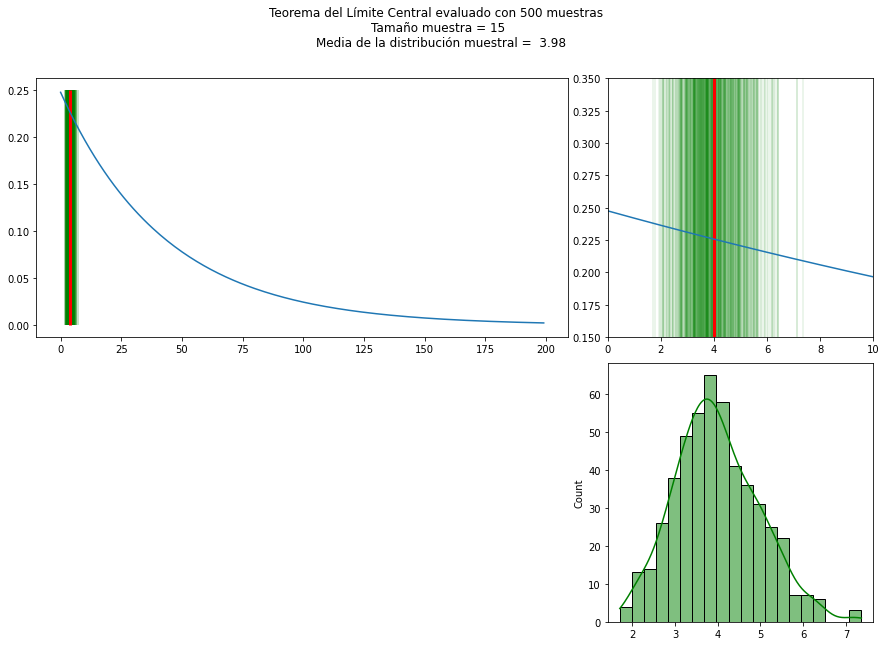

In [23]:
tcl(exp, n_muestra=500, size=15, kde=True)

**_Conclusión_**: La tamaños de muestras (`size`) más pequeñas que 30, si se aumenta la cantidad de espacios muestrales (`n_muestra`) se logra replicar una distribución normal. 

## <font color='green'>**Actividad 2**</font>
### Realice la comprobación  del Teorema del limite central usando una distribución binomial.
1. Calcular medias muestrales y graficar su distribución.
2. Imprima la media y la desviación estándar de la distribubión muestral.

Lo siguiente representa nuestra población distribuida Binomialmente. Recuerde que Binomial es una distribución discreta. Vemos la función de masa de probabilidad a continuación:

$$P(x) = \left \{ \begin{matrix} {k \choose x} (p)^x (1-p)^{1-x} & \mbox{ si x = 0,1,2,3....,k}
\\ 0 & \mbox{de otra manera }\end{matrix}\right.$$

Donde $0\le p \le1$

$$\mathbb{E}(X) = kp $$

$$std = \sqrt{kp(1-p)}$$

Para este ejemplo, asumimos que nuestra población sigue una distribución Binomial con parámetros $k = 30$ y $p = 0.9$. Lo que significa que si el teorema central del limite se mantuviera, la distribución muestral debería ser aproximadamente normal con media = media poblacional $\mu = 27$ y $std = \frac{\sigma}{\sqrt{n}} = 0.0734$.



---
La variable aleatoria "X" sigue una distribución binomial con parametros k=30 y p = 0.9

X ~ binomial(k=30; p = 0.9)


In [72]:
# Tu código aquí ...

def tcl_binom(var, n_muestra, size, kde=True):
  '''
  n_muestra :: Cantidad de muestras
  size :: Tamaño de cada muestra
  '''
  fig, ax = plt.subplots(figsize=(15,10))
  grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.1, width_ratios=[2, 1])

  muestra = []
  x_medias_muestrales = []
  # Generamos las n_muestras 
  for m in range(n_muestra):
    muestra.append(var.rvs(size=size))
    
  # Plot de la distribución, su media y la media muestral
  ax = plt.subplot(grid[0,0])
  # ax.plot(fmp_binomial)
  x = np.arange(var.ppf(0.0001), var.ppf(0.9999))
  ax.plot(x, var.pmf(x))
  for m in muestra:
    ax.vlines(m.mean(), ymin=0, ymax=0.25, colors='g', alpha=0.1)
    x_medias_muestrales.append(m.mean())
  ax.vlines(x=var.mean(), ymin=0, ymax=0.25, colors='r', linewidths=3)

  # Zoom in de lo anterior
  ax = plt.subplot(grid[0,1])
  ax.plot(x, var.pmf(x))
  for m in muestra:
    ax.vlines(m.mean(), ymin=0, ymax=0.35, colors='g', alpha=0.1)
  ax.set_xlim(26,28)
  ax.set_ylim(0.15, 0.25)
  ax.vlines(x=var.mean(), ymin=0, ymax=0.35, colors='r', linewidths=3)

  # El plot 3 nos lo saltamos y dejamos el espacio vacío
  ax = plt.subplot(grid[1,0])
  plt.axis('off')

  # Ploteamos un histograma con KDE de la distribución de las medias muestrales
  ax = plt.subplot(grid[1,1])
  #ax.set_xlim(0, 10)
  sns.histplot(x_medias_muestrales, kde=kde, bins=20, color='g')
  plt.suptitle(f'''Teorema del Límite Central evaluado con {n_muestra} muestras \
  \nTamaño muestra = {size}\
  \nMedia de la distribución muestral = {np.mean(x_medias_muestrales): 4.2f}\
  \nDesviación estandard de la distribución muestral = {np.std(x_medias_muestrales): 4.4f}''')
  plt.show()


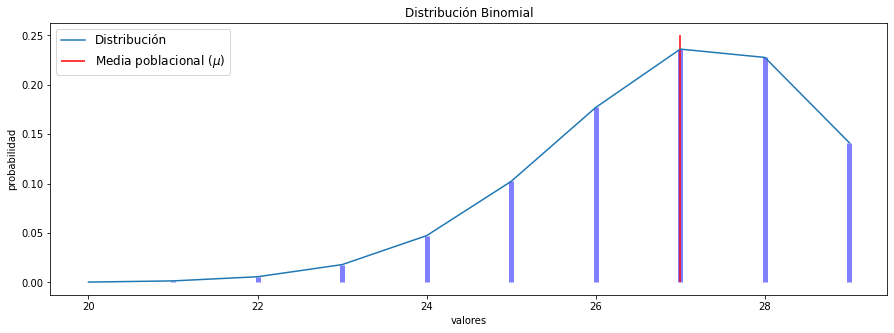

In [60]:
# Definimos nuestra población con distribución binomial con k = 30 y p = 0.90
N, p = 30, 0.90 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
# Creamos un espacio lineal y la FDP de nuestra variable
x = np.arange(binomial.ppf(0.0001), binomial.ppf(0.9999))
fmp_binomial = binomial.pmf(x)
# aleatorios_b = binomial.rvs(10000)  # genera aleatorios

# Ploteamos la distribución y su media (rojo)
plt.figure(figsize=(15,5))

plt.plot(x, fmp_binomial, label = 'Distribución')
plt.vlines(x, 0, fmp_binomial, colors='b', lw=5, alpha=0.5)
plt.vlines(x=binomial.mean(), ymin=0, ymax=0.25, colors='r', label='Media poblacional ($\mu$)')
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(fontsize=12)
plt.show()


In [76]:
# Calculemos los parámetros de la población bibomial
print(f'Media poblacional\t\t= {binomial.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {binomial.std():4.2f}')
print()
size_muestra = 500
std_muestra = binomial.std()/np.sqrt(size_muestra)
print(f'Desviación estándar muestra para n={size_muestra} es {std_muestra:4.4f}')

Media poblacional		= 27.00
Desviación estándar poblacional	= 1.64

Desviación estándar muestra para n=500 es 0.0735


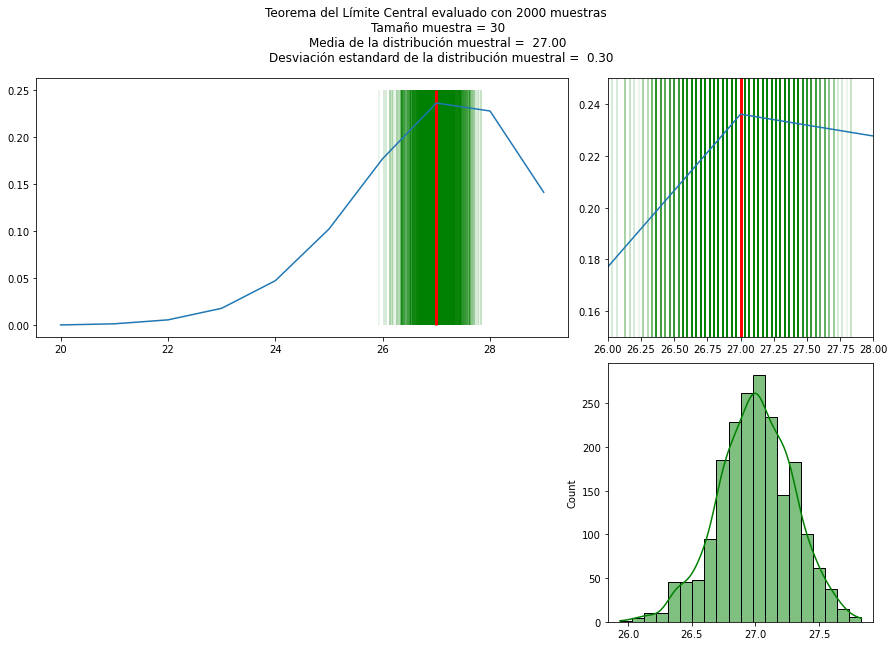

In [69]:
tcl_binom(var=binomial, n_muestra=2000, size=30, kde=True)

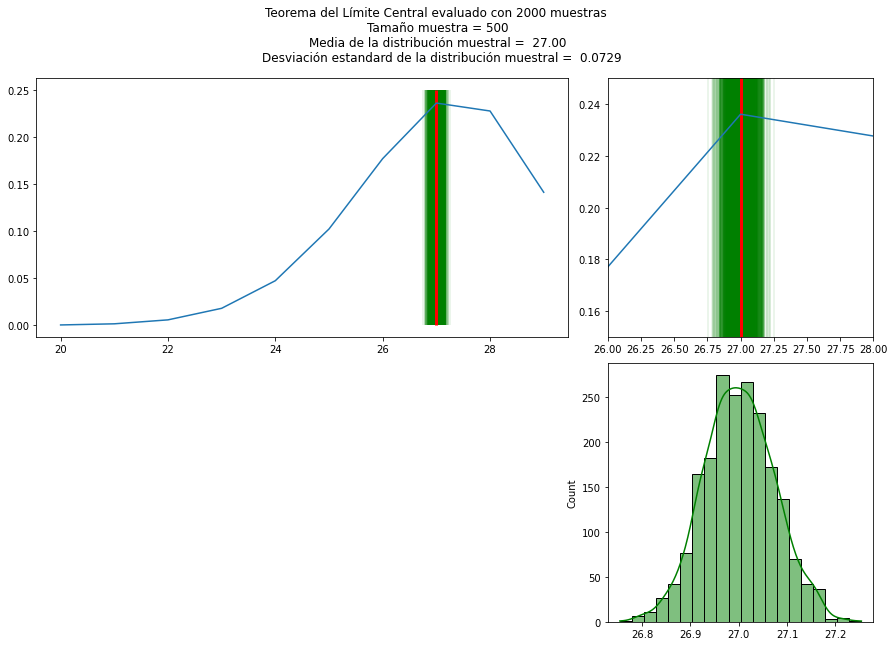

In [74]:
tcl_binom(var=binomial, n_muestra=1000, size=500, kde=True)

**_Conclusión_**: Para un tamaño de muestra (n) de 500 elementos, la distribución muestral es aproximadamente normal con media poblacional ($\mu$) igual a 27, y con desviación estandar muestral ($std = \frac{\sigma}{\sqrt{n}}$) igual a 0.73. 

Notar que si se modifica el tamaño muestral a n = 30 elementos, la distribución muestral sigue teniendo media igual a 27, pero con desviación estandar muestral mayor (= 0.30, pues "n" es más pequeño).


<font color='green'>Fin Actividad 2</font>